
## Over-fitting and Model Tuning

With the computational capacity of today's computers, we are more capable of modeling complex relationships. Given this ability, it is quite easy for models of overemphasize patterns that do not occur in reality. The purpose of this module is to describe the phenomena of 'over-fitting' and some problems it can cause. 



In [18]:
#0. Setting up our labbook environment 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [24]:
# 1. Load datasets
datasets_folder = "/datasets"
predictors = pd.read_csv("/Users/innocentjr/Desktop/AccessBankSummer2018/PythonResources/Applied-Predictive-Modeling-with-Python/datasets/twoClassData/predictors.csv")
classes = pd.read_csv("/Users/innocentjr/Desktop/AccessBankSummer2018/PythonResources/Applied-Predictive-Modeling-with-Python/datasets/twoClassData/classes.csv")


In [26]:
# 2. Drop uninformative columns
predictors.drop('Unnamed: 0', axis=1, inplace=True)
classes.drop('Unnamed: 0', axis=1, inplace=True)
print (predictors.shape)
print (classes.shape)



(208, 2)
(208, 1)


In [27]:
classes.head(3)

,0
0,Class2
1,Class2
2,Class2


In [ ]:
# 3. Set up our plots prarameters 
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

In [37]:
predictors.head(3)

,PredictorA,PredictorB
0,0.1582,0.1609
1,0.6552,0.4918
2,0.7060,0.6333


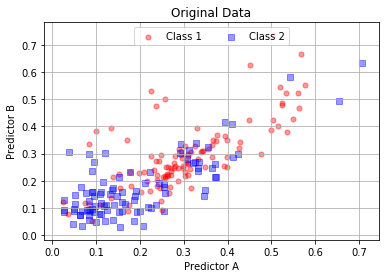

In [28]:
#Plotting our initial graph 
colors = ['r', 'b']
markers = ['o', 's']
c = ['Class1', 'Class2']

for k, m in enumerate(colors):
    i = np.where(classes.iloc[:,0] == c[k])[0]
    if k == 0:
        plt.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='Class 1')
    else:
        plt.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='Class 2')

plt.title('Original Data')
plt.xlabel('Predictor A')
plt.ylabel('Predictor B')
plt.legend(loc='upper center', ncol=2)
plt.show()

In [38]:
#Demonstrating an Example of Overfitting

# Create the mesh
## basic settings for classification boundary
X = np.array(predictors)
y = np.ravel(classes)

h = .002  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() -0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [44]:
np.ravel(classes).shape

(208,)

In [45]:
#Classification: K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

## 3 neighbors (use odd value to avoid ties)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
Z3 = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)
Z3 = (Z3 == 'Class1').astype('int')

## optimal neighbors
knn_param = {
    'n_neighbors': np.arange(1, 100),
}

gs_neigh = GridSearchCV(KNeighborsClassifier(), knn_param, cv = 2, n_jobs=-1)
gs_neigh.fit(X, y)
Z = gs_neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z = (Z == 'Class1').astype('int')

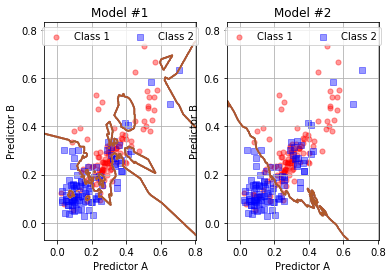

In [12]:
#Configure plots
colors = ['r', 'b']
markers = ['o', 's']
c = ['Class1', 'Class2']

fig, (ax1, ax2) = plt.subplots(1,2)

for k, m in enumerate(colors):
    i = np.where(classes.iloc[:,0] == c[k])[0]
    if k == 0:
        ax1.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                   c=m, marker=markers[k], alpha=0.4, s=26, label='Class 1')
    else:
        ax1.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                   c=m, marker=markers[k], alpha=0.4, s=26, label='Class 2')
ax1.set_title('Model #1')
ax1.set_xlabel('Predictor A')
ax1.set_ylabel('Predictor B')
ax1.legend(loc='upper center', ncol=2)

ax1.contour(xx, yy, Z3, cmap=plt.cm.Paired)

for k, m in enumerate(colors):
    i = np.where(classes.iloc[:,0] == c[k])[0]
    if k == 0:
        ax2.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='Class 1')
    else:
        ax2.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='Class 2')

ax2.set_title('Model #2')
ax2.set_xlabel('Predictor A')
ax2.set_ylabel('Predictor B')
ax2.legend(loc='upper center', ncol=2)
# plot boundary
ax2.contour(xx, yy, Z, cmap=plt.cm.Paire  d)

## Data Transformation and Scaling

In [46]:
import numpy as np
import pandas as pd

# Set up environment 
# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

#Import the file into our workspace
cell_segmentation = pd.read_csv("/Users/innocentjr/Desktop/AccessBankSummer2018/PythonResources/Applied-Predictive-Modeling-with-Python/datasets/segmentationOriginal/segmentationOriginal.csv")

#View the shape of the data
cell_segmentation.shape

#View the table by case type
cell_segmentation.groupby('Case').count()


,Unnamed: 0,Cell,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
Case,,,,,,,,,,,,,,,,,,,,,
Test,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,...,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010
Train,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,...,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009


<Figure size 720x540 with 0 Axes>

In [48]:
#Separate data into training and test data set
cell_train = cell_segmentation[cell_segmentation['Case'] == 'Train']
cell_test = cell_segmentation[cell_segmentation['Case'] == 'Test']

**Centering and Scaling**
When you center a prediction variable, we subtract the average value (central tendency) from the value. Scaling forces teh data to have a commond standard deviation. The benefits are tremendous when working with different types of expecially quanitative data. The downside is the difficulty in prediction. 

**Transformations to Resolve Skewness**
An unskewed distribution is roughly symetric. A rule of thumb is that if the rationof the highest value to the lower is greater than 20, then the distribution is significantly skewed. 

The skewness of hte sample is: 
$$\text{skewness} = {\sum (x_i - \bar{x})^3 \over (n - 1) v^{3/2}},$$ where $$v = {\sum (x_i - \bar{x})^2 \over (n - 1)}.$$ Note that the skewness for a normal distribution is zero.




### Let's demonstrate this with the cell segmentation data.


Text(0.5,0,'Square Root Units')

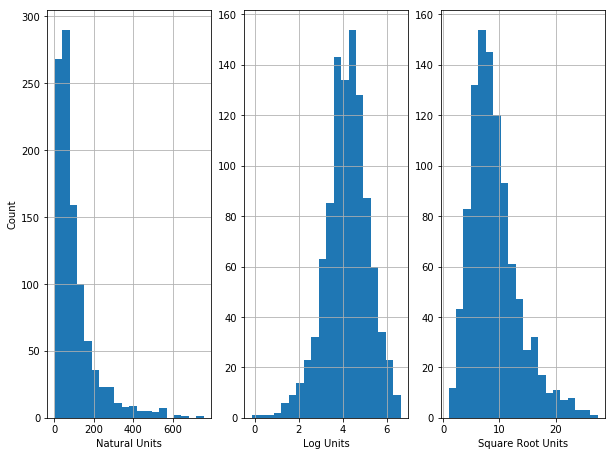

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(cell_train['VarIntenCh3'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(np.log(cell_train['VarIntenCh3'].values), bins=20)
ax2.set_xlabel('Log Units')

ax3.hist(np.sqrt(cell_train['VarIntenCh3'].values), bins=20)
ax3.set_xlabel('Square Root Units')

**Identifying the correct transformation**

In [50]:
from scipy.stats import skew
r = np.max(cell_train['VarIntenCh3'].values)/np.min(cell_train['VarIntenCh3'].values)
skewness = skew(cell_train['VarIntenCh3'].values)

print('Ratio of the smallest to largest value is {0} \nSample skewness statistic is {1}'.format(r, skewness))


Ratio of the smallest to largest value is 870.8872472027832 
Sample skewness statistic is 2.3951841812380814


In [51]:
#The boxcox() module int eh scipy.stats lib provide a method for choosing the approriate transformation
from scipy.stats import boxcox

print('Estimated lambda is {0}'.format(boxcox(cell_train['VarIntenCh3'].values)[1]))

Estimated lambda is 0.1215319334034963


Text(0.5,0,'Transformed Data (lambda = -1.0913)')

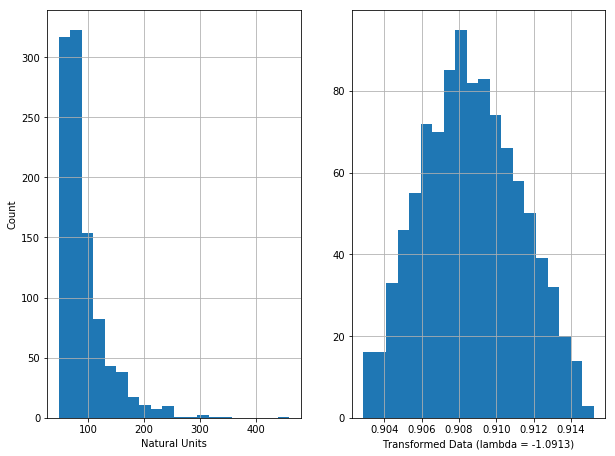

In [52]:
##Demonstrating the boxcox module for another predictor
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(cell_train['PerimCh1'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(boxcox(cell_train['PerimCh1'].values)[0], bins=20)
ax2.set_xlabel('Transformed Data (lambda = {:1.4f})'.format(boxcox(cell_train['PerimCh1'].values)[1]))

## Lab 1: Predicting Fuel Economy

1. Defining a model
2. Fit and visualizing a model
3. Feature selection and model selection
4. Data Science points

In [53]:
from __future__ import division
import numpy as np
import pandas as pd

cars10 = pd.read_csv("/Users/innocentjr/Desktop/AccessBankSummer2018/PythonResources/Applied-Predictive-Modeling-with-Python/datasets/FuelEconomy/cars2010.csv")
cars11 = pd.read_csv("/Users/innocentjr/Desktop/AccessBankSummer2018/PythonResources/Applied-Predictive-Modeling-with-Python/datasets/FuelEconomy/cars2011.csv")


In [56]:
#View the shape
print (cars10.shape)
print( cars11.shape)

(1107, 15)
(245, 15)


In [57]:
#Check for null values
cars10.count(), cars11.count()

(Unnamed: 0             1107
 EngDispl               1107
 NumCyl                 1107
 Transmission           1107
 FE                     1107
 AirAspirationMethod    1107
 NumGears               1107
 TransLockup            1107
 TransCreeperGear       1107
 DriveDesc              1107
 IntakeValvePerCyl      1107
 ExhaustValvesPerCyl    1107
 CarlineClassDesc       1107
 VarValveTiming         1107
 VarValveLift           1107
 dtype: int64, Unnamed: 0             245
 EngDispl               245
 NumCyl                 245
 Transmission           245
 FE                     245
 AirAspirationMethod    245
 NumGears               245
 TransLockup            245
 TransCreeperGear       245
 DriveDesc              245
 IntakeValvePerCyl      245
 ExhaustValvesPerCyl    245
 CarlineClassDesc       245
 VarValveTiming         245
 VarValveLift           245
 dtype: int64)

In [58]:
#Feature selection
cars10_feature = cars10.get(['EngDispl'])
cars10_target = cars10.get(['FE'])
cars11_feature = cars11.get(['EngDispl'])
cars11_target = cars11.get(['FE'])

Text(0.06,0.5,'Fuel Efficiency (MPG)')

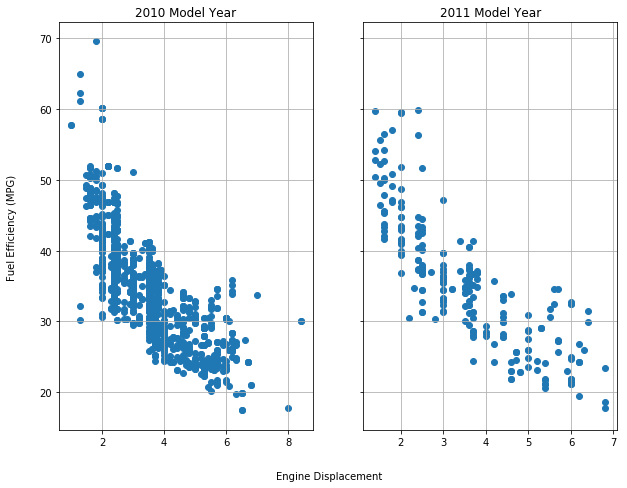

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.scatter(cars10_feature, cars10_target)
ax1.set_title('2010 Model Year')
ax2.scatter(cars11_feature, cars11_target)
ax2.set_title('2011 Model Year')

fig.text(0.5, 0.04, 'Engine Displacement', ha='center', va='center')
fig.text(0.06, 0.5, 'Fuel Efficiency (MPG)', ha='center', va='center', rotation='vertical')

In [ ]:
#Define out evaluation metric
from sklearn.metrics import mean_squared_error

def rmse(y_actual, y_predicted):
    '''calculate Root Mean Squared Error'''
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

** Linear Model **
$$y = \beta_0 + \beta_1x,$$
where  y
  is the Fuel Efficiency (MPG) and  x
  is the Engine Displacement.

In [60]:
#Fit the linear regression
# simple linear model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(cars10_feature, cars10_target)
print ("Least square estimate: intercept = {0}, coefficient ={1}".format(reg.intercept_, reg.coef_[0]))

Least square estimate: intercept = [50.56322991], coefficient =[-4.52092928]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Text(0,0.5,'Predicted')

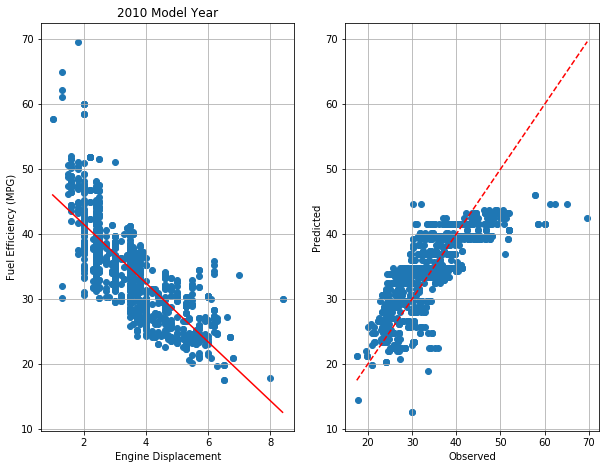

In [61]:
#Visualize the results of the fit
X = np.linspace(np.min(cars10_feature)[0], np.max(cars10_feature)[0])[:, np.newaxis]
y = reg.predict(X)
cars10_target_pred = reg.predict(cars10_feature)
y_range = np.linspace(np.min(cars10_target)[0], np.max(cars10_target)[0])[:, np.newaxis]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cars10_feature, cars10_target)
ax1.plot(X, y, 'r')
ax1.set_title('2010 Model Year')
ax1.set_xlabel('Engine Displacement')
ax1.set_ylabel('Fuel Efficiency (MPG)')

ax2.scatter(cars10_target, cars10_target_pred)
ax2.plot(y_range, y_range, 'r--')
ax2.set_xlabel('Observed')
ax2.set_ylabel('Predicted')

In [62]:
#Scoring the model
from sklearn.cross_validation import cross_val_score

scores = np.sqrt(np.abs(cross_val_score(reg, cars10_feature, cars10_target, cv=10, scoring='mean_squared_error')))
print ("RMSE: {0}".format(np.mean(scores)))

RMSE: 4.727740960204629


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

** Quadratic Model **
$$y = \beta_0 + \beta_1 x + \beta_2 x^2,$$

****Notice:**** The relationship there is a linear and non-linear component in the model

In [63]:
#Evaluate and score the quadractic model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

quad = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad.fit(cars10_feature, cars10_target)

scores = np.sqrt(np.abs(cross_val_score(quad, cars10_feature, cars10_target, cv=10, scoring='mean_squared_error')))
print ("RMSE: {0}".format(np.mean(scores)))

RMSE: 4.34528462825047


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

The reduction in RMSE suggest a better fit.

Text(0,0.5,'Predicted')

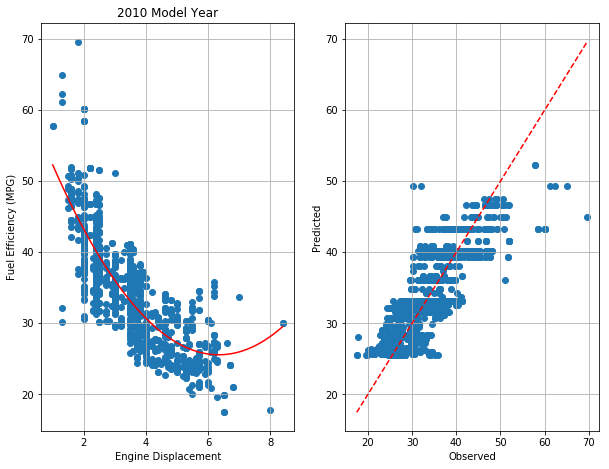

In [64]:
#Let's visualize the quadratic model's performance
X = np.linspace(np.min(cars10_feature)[0], np.max(cars10_feature)[0])[:, np.newaxis]
y = quad.predict(X)
cars10_target_pred = quad.predict(cars10_feature)
y_range = np.linspace(np.min(cars10_target)[0], np.max(cars10_target)[0])[:, np.newaxis]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cars10_feature, cars10_target)
ax1.plot(X, y, 'r')
ax1.set_title('2010 Model Year')
ax1.set_xlabel('Engine Displacement')
ax1.set_ylabel('Fuel Efficiency (MPG)')

ax2.scatter(cars10_target, cars10_target_pred)
ax2.plot(y_range, y_range, 'r--')
ax2.set_xlabel('Observed')
ax2.set_ylabel('Predicted')

**Copied from 'Source and Attribution'**

One issue with quadratic models is that they can perform poorly on the extremes of the predictor. From the above figure, one might notice that predicting new vehicles with large displacement values may produce inaccurate results.
    
There are other approaches for creating sophisticated relationships between the predictors and outcome. One particular technique is the multivariate adaptive regression spline (MARS) model (Friedman (1991)). When used with a single predictor, MARS can fit separate linear regression lines for different ranges of engine displacement. This model, like many machine learning algorithms, has a tuning parameter which cannot be directly estimated from the data. While the MARS model has internal algorithms for making this dtermination, the user can try different values and use resampling to determin the appropriate value. Once the value is found, a final MARS model would be fit using all the training set data and used for prediction.
    

In [66]:
from pyearth import Earth

mars = Earth()
mars.fit(cars10_feature, cars10_target)
scores = np.sqrt(np.abs(cross_val_score(mars, cars10_feature, cars10_target, cv=10, scoring='mean_squared_error')))
print ("RMSE: {0}".format(np.mean(scores)))

ModuleNotFoundError: No module named 'pyearth'

In [ ]:
X = np.linspace(np.min(cars10_feature)[0], np.max(cars10_feature)[0])[:, np.newaxis]
y = mars.predict(X)
cars10_target_pred = mars.predict(cars10_feature)
y_range = np.linspace(np.min(cars10_target)[0], np.max(cars10_target)[0])[:, np.newaxis]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cars10_feature, cars10_target)
ax1.plot(X, y, 'r')
ax1.set_title('2010 Model Year')
ax1.set_xlabel('Engine Displacement')
ax1.set_ylabel('Fuel Efficiency (MPG)')

ax2.scatter(cars10_target, cars10_target_pred)
ax2.plot(y_range, y_range, 'r--')
ax2.set_xlabel('Observed')
ax2.set_ylabel('Predicted')

In [ ]:
X = np.linspace(np.min(cars11_feature)[0], np.max(cars11_feature)[0])[:, np.newaxis]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cars11_feature, cars11_target)
ax1.plot(X, quad.predict(X), 'r')
ax1.set_xlabel('Engine Displacement')
ax1.set_ylabel('Fuel Efficiency (MPG)')
ax1.set_title('Quadratic model')

ax2.scatter(cars11_feature, cars11_target)
ax2.plot(X, mars.predict(X), 'r')
ax2.set_xlabel('Engine Displacement')
ax2.set_ylabel('Fuel Efficiency (MPG)')
ax2.set_title('MARS')

In [ ]:
# RMSE
quad_scores = np.sqrt(np.abs(cross_val_score(quad, cars11_feature, cars11_target, cv=10, scoring='mean_squared_error')))
mars_scores = np.sqrt(np.abs(cross_val_score(mars, cars11_feature, cars11_target, cv=10, scoring='mean_squared_error')))

print "Quadratic model RMSE: {0} and MARS RMSE: {1}".format(np.mean(quad_scores), np.mean(mars_scores))